<a href="https://colab.research.google.com/github/SR2090/Image-Classification-MNIST/blob/main/ImageClassificationUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

## 2. Importing and Loading the data

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
labelMap = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## 3. Explore the data

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [7]:
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output Classes : ', classes)

Total number of outputs :  10
Output Classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

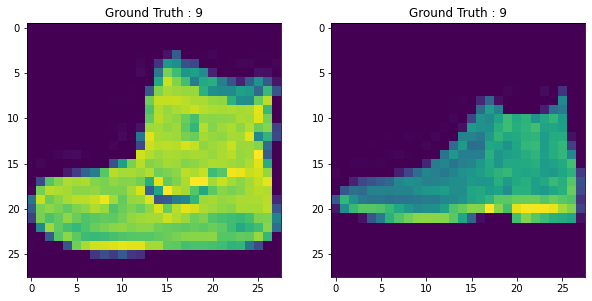

In [8]:
plt.figure(figsize=[10,5])
# Display the first image in the training data
# plt.subplot(121);plt.imshow(train_images[0,:,:]);plt.title("Ground Truth : {}".format(train_labels[0]))
# plt.subplot(121);plt.imshow(test_images[0,:,:]);plt.title("Ground Truth : {}".format(test_labels[0]))
plt.subplot(121)
plt.imshow(train_images[0,:,:])
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:])
plt.title("Ground Truth : {}".format(test_labels[0]))

## 4. Preprocess the data

Perform normalization of data (i.e. convert the images to float and normalize the intensity values to lie between 0-1 and convert the labels to categorical variables to be used in Keras.

In [9]:
nDims = 1
nRows, nCols = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
# Input shape to feed it to the neural network
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows,nCols,nDims)

In [10]:
# Normalize the value between 0 and 1 
# 1. Convert to float32
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
# 2. Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

- Category is changed from integer to boolean representation using the to_categorical in keras. 

In [11]:
train_labels_one_hot = to_categorical(train_labels)
test_lables_one_hot = to_categorical(test_labels)

In [12]:
print('Original Label 0 :', train_labels[0])
print('After conversion to categorical (one-hot): ', train_labels_one_hot[0])
train_labels

Original Label 0 : 9
After conversion to categorical (one-hot):  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## 5. Model Architecture
- This is obtained through hit and trial
- Find an existing problem model and try to reconfigure it for the problem you are trying to solve
- Both the aformentioned should be similar

"" For implementing a CNN, we will stack up Convolutional Layers, followed by Max Pooling layers. We will also include Dropout to avoid overfitting.

Finally, we will add a fully connected ( Dense ) layer followed by a softmax layer. Given below is the model structure.

We use 6 convolutional layers and 1 fully-connected layer.

The first 2 convolutional layers have 32 filters / kernels with a window size of 3×3.
The remaining conv layers have 64 filters.
We also add a max pooling layer with window size 2×2 after each pair of conv layer.
We add a dropout layer with a dropout ratio of 0.25 after every pooling layer.
In the final line, we add the dense layer which performs the classification among 10 classes using a softmax layer.""

In [13]:
# def createModel():
#   model = Sequential()
#   # THe first 2 layers have 32 filters of window size 3x3 bigger kernels are not efficient and hardly produce better result
#   # Sometimes they even may produce worse result
#   model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape))
#   # second conv layer to obtain hierarcial features
#   model.add(Conv2D(32, (3, 3), activation='relu'))
#   # Redue the length and width to improve efficiency
#   model.add(MaxPooling2D(pool_size(2,2)))
#   # Dropout to prevent overfitting
#   model.add(Dropout(0.25))

#   model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
#   model.add(Conv2D(64,(3,3),activation='relu')
#   model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(Dropout(0.25))

#   model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#   model.add(Conv2D(64, (3, 3), activation='relu'))
#   model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(Dropout(0.25))

#   model.add(Flatten())
#   model.add(Dense(512, activation='relu'))
#   model.add(Dropout(0.5))
#   model.add(Dense(nClasses, activation='softmax'))
    
#   return model

SyntaxError: ignored

In [16]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [17]:
model1 = createModel()
batch_size = 256
epochs = 20
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)         

## 6. Training the model

In [19]:
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_lables_one_hot))
# test_loss,test_accuracy = model1.evaluate(test_data, test_labels_one_hot)

Epoch 1/20
235/235 [==============================] - 4s 17ms/step - loss: 0.8870 - accuracy: 0.6678 - val_loss: 0.5814 - val_accuracy: 0.7727
Epoch 2/20
235/235 [==============================] - 4s 16ms/step - loss: 0.5045 - accuracy: 0.8134 - val_loss: 0.4625 - val_accuracy: 0.8247
Epoch 3/20
235/235 [==============================] - 4s 15ms/step - loss: 0.4041 - accuracy: 0.8523 - val_loss: 0.3519 - val_accuracy: 0.8706
Epoch 4/20
235/235 [==============================] - 4s 16ms/step - loss: 0.3532 - accuracy: 0.8717 - val_loss: 0.2989 - val_accuracy: 0.8924
Epoch 5/20
235/235 [==============================] - 4s 15ms/step - loss: 0.3161 - accuracy: 0.8852 - val_loss: 0.2973 - val_accuracy: 0.8871
Epoch 6/20
235/235 [==============================] - 4s 15ms/step - loss: 0.2953 - accuracy: 0.8944 - val_loss: 0.2698 - val_accuracy: 0.9011
Epoch 7/20
235/235 [==============================] - 4s 15ms/step - loss: 0.2751 - accuracy: 0.9005 - val_loss: 0.2741 - val_accuracy: 0.9017

## 7. Checking loss and accuracy curves 

### 7.1 Training Loss vs Validation Loss

- Training and validation loss both going down

Text(0.5, 1.0, 'Loss Curves')

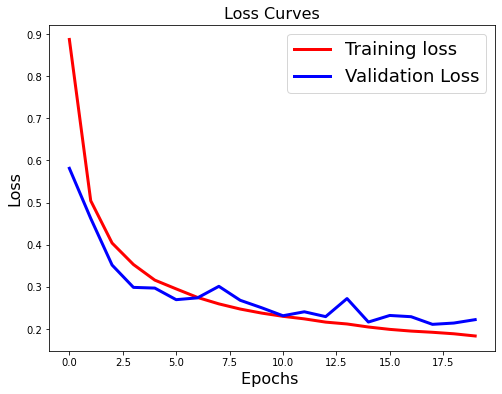

In [20]:
# Trai
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

### 7.2 Traing Accuracy vs Validation Accuracy

  - Training and Validation loss both are increasing

Text(0.5, 1.0, 'Accuracy Curves')

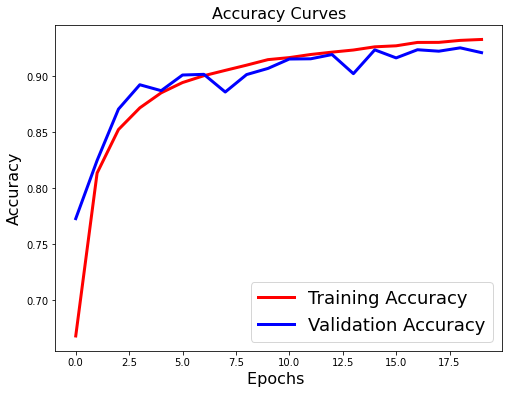

In [21]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## 8. Draw Inference 

### 8.1 On a centered Image

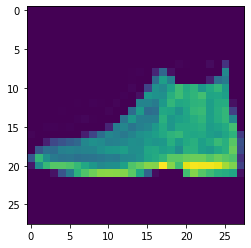

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Label = 9, Item = Ankle boot


In [22]:
testSample = test_data[0,:]
plt.imshow(testSample.reshape(28,28));plt.show()

label = model1.predict_classes(testSample.reshape(1,28,28,nDims))[0]
print("Label = {}, Item = {}".format(label,labelMap[label]))

### 8.2 On a Shifted Up image

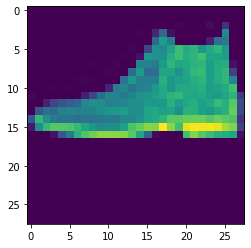

Label = 9, Item = Ankle boot


In [23]:
shiftUp = np.zeros(testSample.shape)
shiftUp[1:20,:] = testSample[6:25,:]
plt.imshow(shiftUp.reshape(28,28));plt.show()

label = model1.predict_classes(shiftUp.reshape(1,28,28,nDims))[0]
print("Label = {}, Item = {}".format(label,labelMap[label]))

### 8.3 On a shifted down image

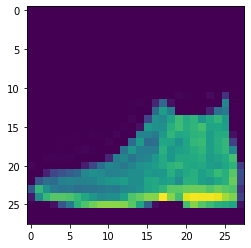

Label = 9, Item = Ankle boot


In [24]:
shiftDown = np.zeros(testSample.shape)
shiftDown[10:27,:] = testSample[6:23,:]
plt.imshow(shiftDown.reshape(28,28));plt.show()

label = model1.predict_classes(shiftDown.reshape(1,28,28,nDims))[0]
print("Label = {}, Item = {}".format(label,labelMap[label]))

### 8.4 On left shit

TypeError: ignored

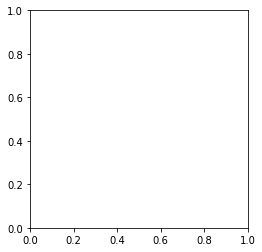

In [28]:
# testSample.shape
# shiftDown = np.zeros((56,56,1))
# shiftDown[5:22,0:28] = testSample[6:23,0:28]
# plt.imshow(shiftDown);plt.show()

# label = model1.predict_classes(shiftDown.reshape(1,28,28,nDims))[0]
# print("Label = {}, Item = {}".format(label,labelMap[label]))